In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read in Files

In [72]:
#read the radar rain gage data + convert to datetime
EAST_radar = pd.read_csv('HanaleiEAST_radar.csv')
EAST_radar['datetime'] = pd.to_datetime(EAST_radar['datetime'])

WEST_radar = pd.read_csv('HanaleiWEST_radar.csv')
WEST_radar['datetime'] = pd.to_datetime(WEST_radar['datetime'])

### Select the GSSHA files to work with

In [73]:
GSSHA_gage_file = '2018-12-29_2018-12-30GSSHA_rain_gagesFILLNA.csv'
GSSHA_meta_file = '2018-12-29_2018-12-30GSSHA_rain_gage_meta.csv'

In [74]:
#read GSSHA rain gage file and GSSHA metadata gage file
GSSHA_filled_NA_gages = pd.read_csv(GSSHA_gage_file)
GSSHA_filled_NA_gages['DateTime'] = pd.to_datetime(GSSHA_filled_NA_gages['DateTime'])

GSSHA_gage_meta = pd.read_csv(GSSHA_meta_file)

# Add radar rain gages to the meta data

In [75]:
#add rows for the new radar gages
GSSHA_gage_meta = GSSHA_gage_meta.append(pd.Series(), ignore_index=True)
GSSHA_gage_meta = GSSHA_gage_meta.append(pd.Series(), ignore_index=True)

# #add radar files
GSSHA_gage_meta['FILENAME'].iloc[-1] = 'EAST_RADAR'
GSSHA_gage_meta['LAT'].iloc[-1] = EAST_radar.lat[0]
GSSHA_gage_meta['LON'].iloc[-1] = EAST_radar.lon[0]

GSSHA_gage_meta['FILENAME'].iloc[-2]  = 'WEST_RADAR'
GSSHA_gage_meta['LAT'].iloc[-2] = WEST_radar.lat[0]
GSSHA_gage_meta['LON'].iloc[-2] = WEST_radar.lon[0]

#re save the file to update it
GSSHA_gage_meta.to_csv(GSSHA_meta_file)

C:\Users\bgorb\AppData\Local\Temp\ipykernel_13704\194891851.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  GSSHA_gage_meta = GSSHA_gage_meta.append(pd.Series(), ignore_index=True)
C:\Users\bgorb\AppData\Local\Temp\ipykernel_13704\194891851.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSSHA_gage_meta = GSSHA_gage_meta.append(pd.Series(), ignore_index=True)
C:\Users\bgorb\AppData\Local\Temp\ipykernel_13704\194891851.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  GSSHA_gage_meta = GSSHA_gage_meta.append(pd.Series(), ignore_index=True)
C:\Users\bgorb\AppData\Local\Temp\ipykernel_13704\194891851.py:3: FutureWarning: The frame.append method is deprecated and

# Update the GSSHA file with the new radar rain gage data

In [76]:
#start date #end date
start = GSSHA_filled_NA_gages['DateTime'][0]
end = GSSHA_filled_NA_gages['DateTime'].tolist()[-1]

In [77]:
#Use the start and end date to select the radar data and fill it into radar test
radar_from_dates = EAST_radar.loc[EAST_radar['datetime'].between(start, end)].rain_mm.tolist()
GSSHA_filled_NA_gages['EAST_RADAR'] = radar_from_dates

radar_from_dates = WEST_radar.loc[WEST_radar['datetime'].between(start, end)].rain_mm.tolist()
GSSHA_filled_NA_gages['WEST_RADAR'] = radar_from_dates

In [78]:
#according to HUANG, nan = 0 (no rainfall)

GSSHA_filled_NA_gages['EAST_RADAR_filled_nan'] = np.nan
for i in range(0, len(GSSHA_filled_NA_gages)):
    if np.isnan(GSSHA_filled_NA_gages.EAST_RADAR[i]):
        GSSHA_filled_NA_gages['EAST_RADAR_filled_nan'][i] = 0
    else:
        GSSHA_filled_NA_gages['EAST_RADAR_filled_nan'][i] = GSSHA_filled_NA_gages.EAST_RADAR[i]

GSSHA_filled_NA_gages['WEST_RADAR_filled_nan'] = np.nan
for i in range(0, len(GSSHA_filled_NA_gages)):
    if np.isnan(GSSHA_filled_NA_gages.WEST_RADAR[i]):
        GSSHA_filled_NA_gages['WEST_RADAR_filled_nan'][i] = 0
    else:
        GSSHA_filled_NA_gages['WEST_RADAR_filled_nan'][i] = GSSHA_filled_NA_gages.WEST_RADAR[i]

C:\Users\bgorb\AppData\Local\Temp\ipykernel_13704\4020369210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSSHA_filled_NA_gages['EAST_RADAR_filled_nan'][i] = GSSHA_filled_NA_gages.EAST_RADAR[i]
C:\Users\bgorb\AppData\Local\Temp\ipykernel_13704\4020369210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSSHA_filled_NA_gages['EAST_RADAR_filled_nan'][i] = 0
C:\Users\bgorb\AppData\Local\Temp\ipykernel_13704\4020369210.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

# Save the file

In [79]:
GSSHA_filled_NA_gages.to_csv(GSSHA_gage_file.split('.')[0] +'radarraw.' + GSSHA_gage_file.split('.')[1])

# Plot the data

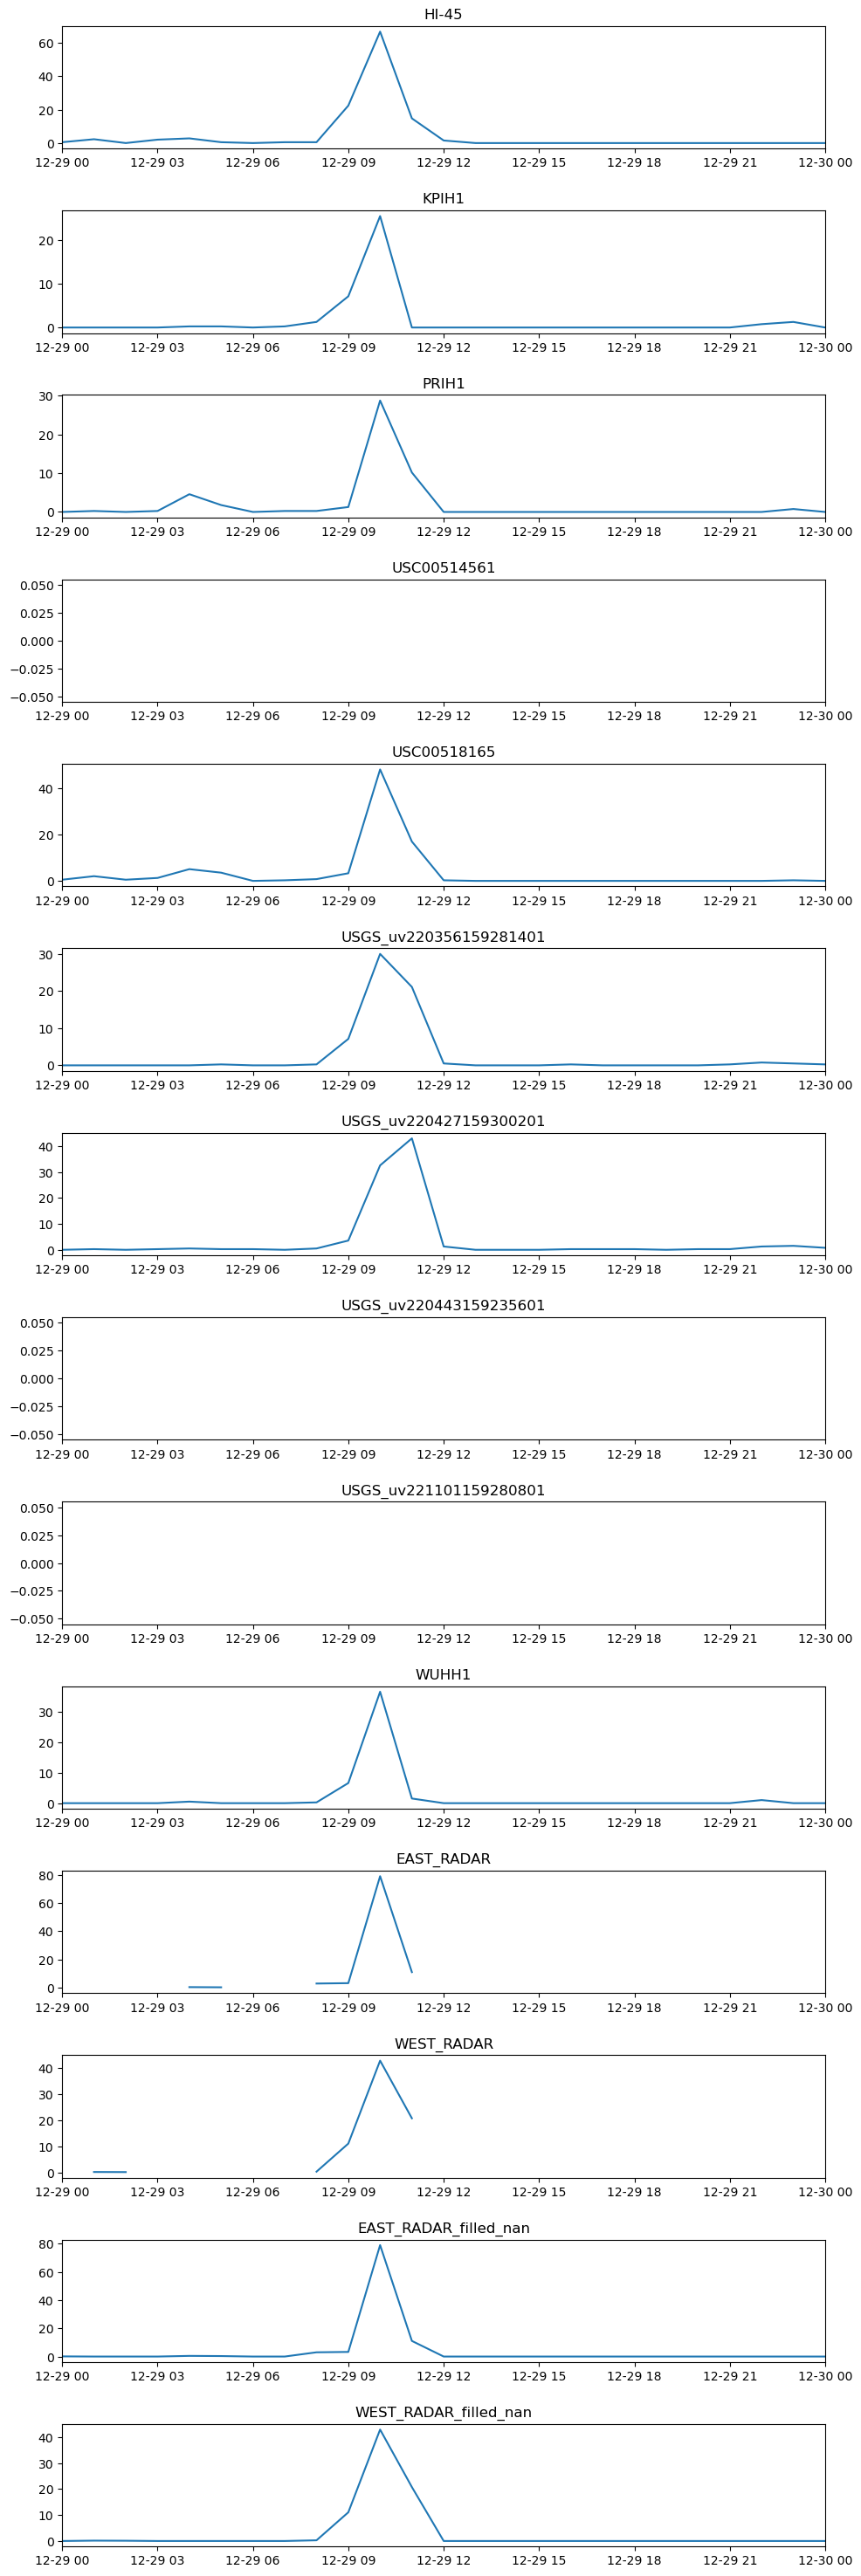

In [80]:
gages_names = (GSSHA_filled_NA_gages.columns.tolist())[3:]

fig, axs= plt.subplots(len(gages_names), figsize=(10,30))
fig.tight_layout(pad=3.0)

for i in range(0, len(gages_names)):
    axs[i].plot(GSSHA_filled_NA_gages['DateTime'], GSSHA_filled_NA_gages[gages_names[i]])
    axs[i].set_title(gages_names[i])
    axs[i].set_xlim((GSSHA_filled_NA_gages['DateTime'].min()), (GSSHA_filled_NA_gages['DateTime'].max()))